In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
df = pd.read_csv("../data/data.mood.csv")

In [4]:
df.shape

(1188, 44)

In [5]:
df.columns

Index(['Unnamed: 0', 'vpn_nr', 'esm_id', 'group', 'bildung', 'bdi',
       'nr_of_episodes', 'nobs_mood', 'trigger_counter', 'form', 'traurig_re',
       'niedergeschlagen_re', 'unsicher_re', 'nervos_re', 'glucklich_re',
       'frohlich_re', 'mood_sad.5', 'mood_fearful.5', 'mood_neg.5',
       'mood_happy.5', 'cesd_sum', 'rrs_sum', 'rrs_brood', 'rrs_reflect',
       'forecast_sad', 'forecast_fear', 'forecast_neg', 'forecast_happy',
       'recall_sad', 'recall_fear', 'recall_neg', 'recall_happy',
       'diff_neg.fore.5', 'diff_sad.fore.5', 'diff_fear.fore.5',
       'diff_happy.fore.5', 'diff_neg.retro.5', 'diff_sad.retro.5',
       'diff_fear.retro.5', 'diff_happy.retro.5', 'mood_sad5_tm1',
       'mood_neg5_tm1', 'mood_fearful5_tm1', 'mood_happy5_tm1'],
      dtype='object')

In [6]:
df = df[["esm_id", "group", "bdi"]]
df.head()

,esm_id,group,bdi
0,10,mdd,25.0
1,10,mdd,25.0
2,10,mdd,25.0
3,10,mdd,25.0
4,10,mdd,25.0


In [7]:
df = df.drop_duplicates(keep="first")

In [8]:
df.shape

(67, 3)

In [9]:
df.head()

,esm_id,group,bdi
0,10,mdd,25.0
14,9,mdd,30.0
29,6,mdd,26.0
45,7,mdd,35.0
64,12,mdd,44.0


In [10]:
print(df["bdi"])

0       25.0
14      30.0
29      26.0
45      35.0
64      44.0
        ... 
1104     0.0
1120     2.0
1132     0.0
1151     0.0
1170     1.0
Name: bdi, Length: 67, dtype: float64


In [11]:
df = df[pd.notnull(df["bdi"])]

In [12]:
df.shape

(66, 3)

In [13]:
print(df["bdi"].sort_values())

682     0.0
455     0.0
465     0.0
485     0.0
540     0.0
       ... 
190    39.0
810    41.0
150    43.0
135    43.0
64     44.0
Name: bdi, Length: 66, dtype: float64


In [14]:
df = df.copy()
df["bdi_class"] = pd.cut(df["bdi"], bins=[0, 13.5, 19.5, 28.5, 63], include_lowest=True)

In [15]:
print(df)

      esm_id group   bdi       bdi_class
0         10   mdd  25.0    (19.5, 28.5]
14         9   mdd  30.0    (28.5, 63.0]
29         6   mdd  26.0    (19.5, 28.5]
45         7   mdd  35.0    (28.5, 63.0]
64        12   mdd  44.0    (28.5, 63.0]
...      ...   ...   ...             ...
1104      99   ctl   0.0  (-0.001, 13.5]
1120     100   ctl   2.0  (-0.001, 13.5]
1132     104   ctl   0.0  (-0.001, 13.5]
1151     103   ctl   0.0  (-0.001, 13.5]
1170     102   ctl   1.0  (-0.001, 13.5]

[66 rows x 4 columns]


In [16]:
df["bdi_class"].value_counts()

bdi_class
(-0.001, 13.5]    36
(28.5, 63.0]      17
(19.5, 28.5]      12
(13.5, 19.5]       1
Name: count, dtype: int64

In [17]:
abs_freq = pd.crosstab(index=df["bdi_class"], columns=["Abs. freq."], colnames=[""])
abs_freq

,Abs. freq.
bdi_class,
"(-0.001, 13.5]",36
"(13.5, 19.5]",1
"(19.5, 28.5]",12
"(28.5, 63.0]",17


In [18]:
rel_freq = abs_freq / abs_freq.sum()
rel_freq

,Abs. freq.
bdi_class,
"(-0.001, 13.5]",0.545455
"(13.5, 19.5]",0.015152
"(19.5, 28.5]",0.181818
"(28.5, 63.0]",0.257576


In [19]:
rel_freq.sum()


Abs. freq.    1.0
dtype: float64

In [20]:
rel_freq = pd.crosstab(
    index=df["bdi_class"], columns=["Rel. freq."], colnames=[""], normalize=True
)
rel_freq

,Rel. freq.
bdi_class,
"(-0.001, 13.5]",0.545455
"(13.5, 19.5]",0.015152
"(19.5, 28.5]",0.181818
"(28.5, 63.0]",0.257576


In [21]:
rel_freq.round(2)

,Rel. freq.
bdi_class,
"(-0.001, 13.5]",0.55
"(13.5, 19.5]",0.02
"(19.5, 28.5]",0.18
"(28.5, 63.0]",0.26


In [22]:
grp_freq = pd.crosstab(index=df["group"], columns=["Abs. freq."], colnames=[""])
grp_freq

,Abs. freq.
group,
ctl,36
mdd,30


In [23]:
grp_freq.loc[["mdd", "ctl"], :]

,Abs. freq.
group,
mdd,30
ctl,36


In [24]:
bdi_group_abs_freq = pd.crosstab(index=df["bdi_class"], columns=df["group"])
bdi_group_abs_freq

group,ctl,mdd
bdi_class,,
"(-0.001, 13.5]",36,0
"(13.5, 19.5]",0,1
"(19.5, 28.5]",0,12
"(28.5, 63.0]",0,17


In [25]:
bdi_group_rel_freq = pd.crosstab(
    index=df["bdi_class"], columns=df["group"], normalize=True
)

bdi_group_rel_freq

group,ctl,mdd
bdi_class,,
"(-0.001, 13.5]",0.545455,0.000000
"(13.5, 19.5]",0.000000,0.015152
"(19.5, 28.5]",0.000000,0.181818
"(28.5, 63.0]",0.000000,0.257576


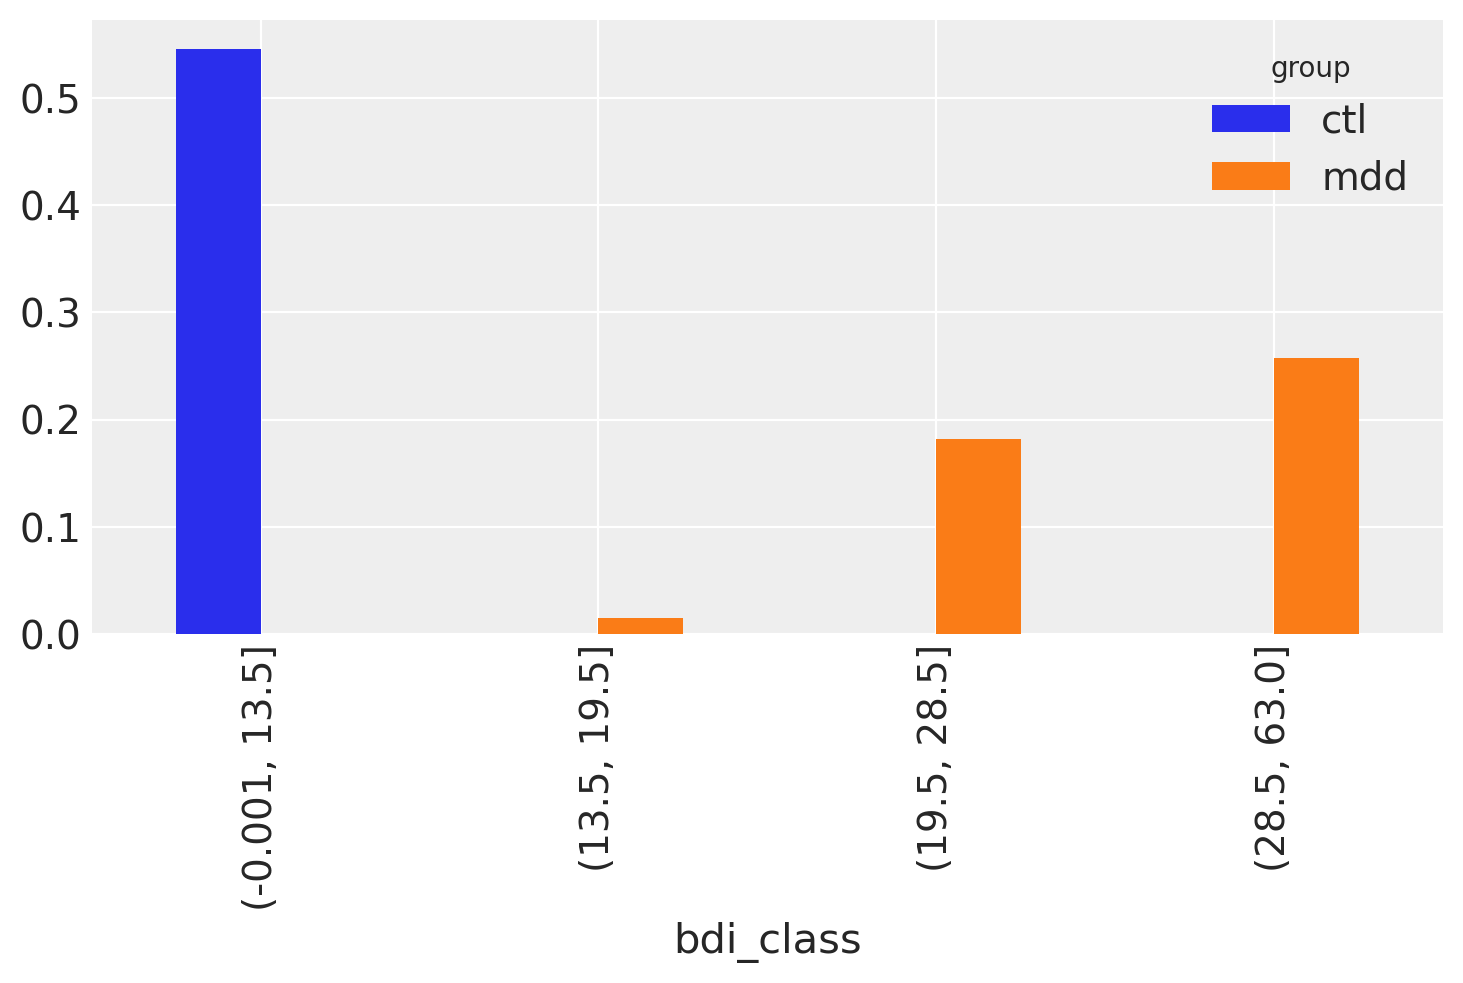

In [26]:
bdi_group_rel_freq.plot.bar();

In [27]:
pd.crosstab(index=df["bdi_class"], columns=df["group"], margins=True)

group,ctl,mdd,All
bdi_class,,,
"(-0.001, 13.5]",36,0,36
"(13.5, 19.5]",0,1,1
"(19.5, 28.5]",0,12,12
"(28.5, 63.0]",0,17,17
All,36,30,66


In [28]:
pd.crosstab(index=df["bdi_class"], columns=df["group"], margins=True, normalize="all")

group,ctl,mdd,All
bdi_class,,,
"(-0.001, 13.5]",0.545455,0.000000,0.545455
"(13.5, 19.5]",0.000000,0.015152,0.015152
"(19.5, 28.5]",0.000000,0.181818,0.181818
"(28.5, 63.0]",0.000000,0.257576,0.257576
All,0.545455,0.454545,1.000000


In [29]:
pd.crosstab(
    index=df["bdi_class"], columns=df["group"], margins=True, normalize="columns"
)

group,ctl,mdd,All
bdi_class,,,
"(-0.001, 13.5]",1.0,0.000000,0.545455
"(13.5, 19.5]",0.0,0.033333,0.015152
"(19.5, 28.5]",0.0,0.400000,0.181818
"(28.5, 63.0]",0.0,0.566667,0.257576


In [30]:
pd.crosstab(index=df["bdi_class"], columns=df["group"], margins=True, normalize="index")

group,ctl,mdd
bdi_class,,
"(-0.001, 13.5]",1.000000,0.000000
"(13.5, 19.5]",0.000000,1.000000
"(19.5, 28.5]",0.000000,1.000000
"(28.5, 63.0]",0.000000,1.000000
All,0.545455,0.454545


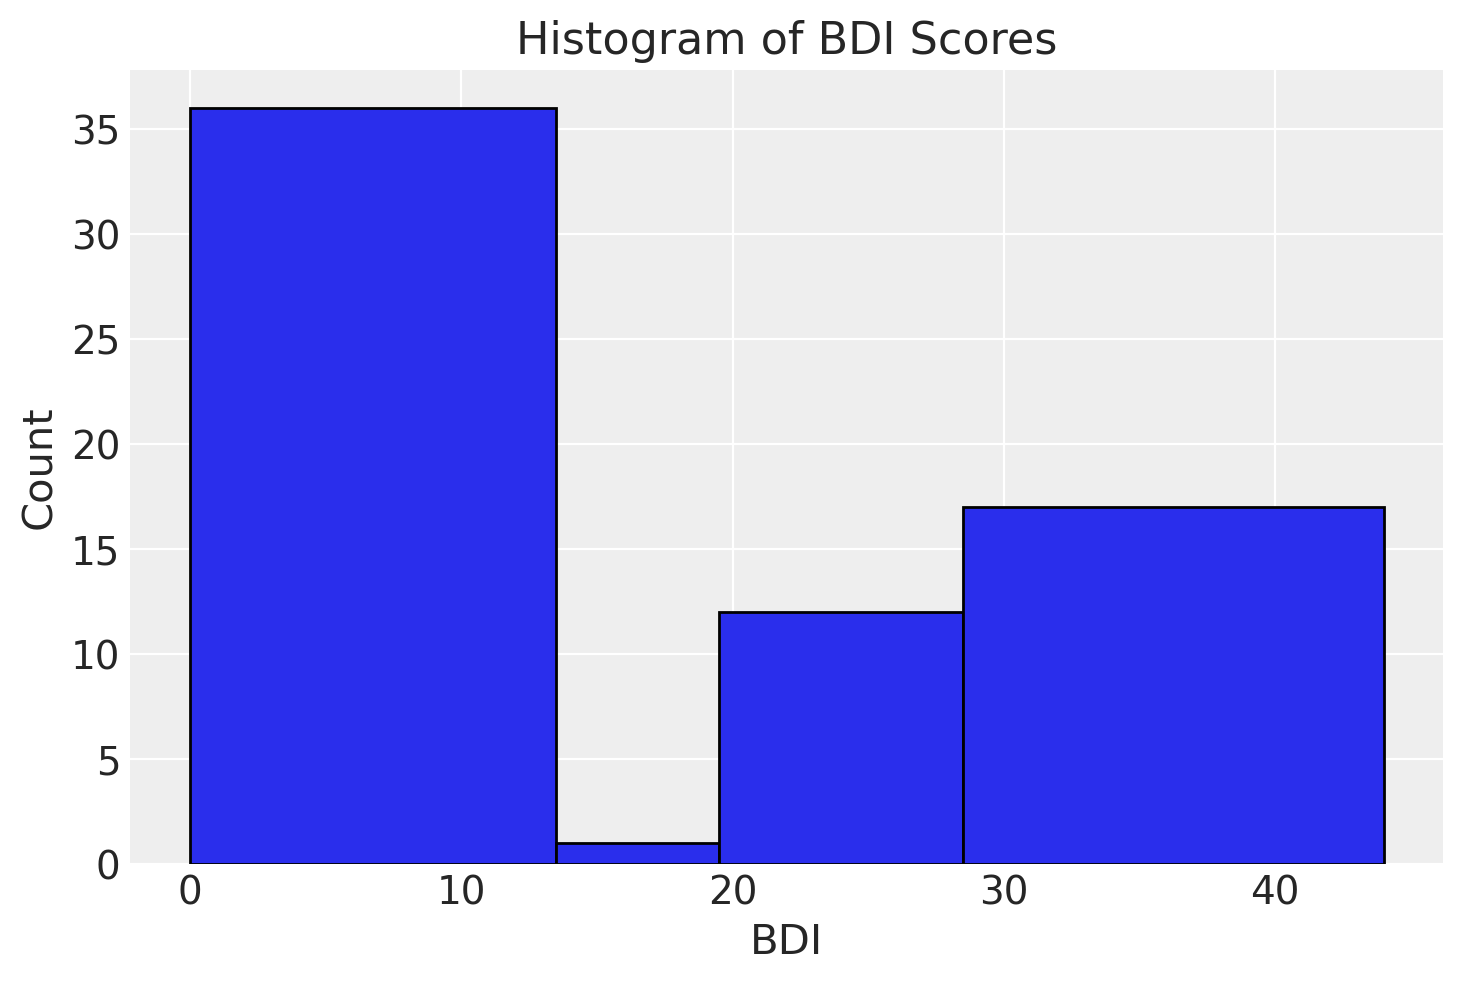

In [31]:
bdi_bins = [0, 13.5, 19.5, 28.5, 44]

plt.hist(df["bdi"], bins=bdi_bins, edgecolor="black")
plt.xlabel("BDI")
plt.ylabel("Count")
plt.title("Histogram of BDI Scores")
plt.show()

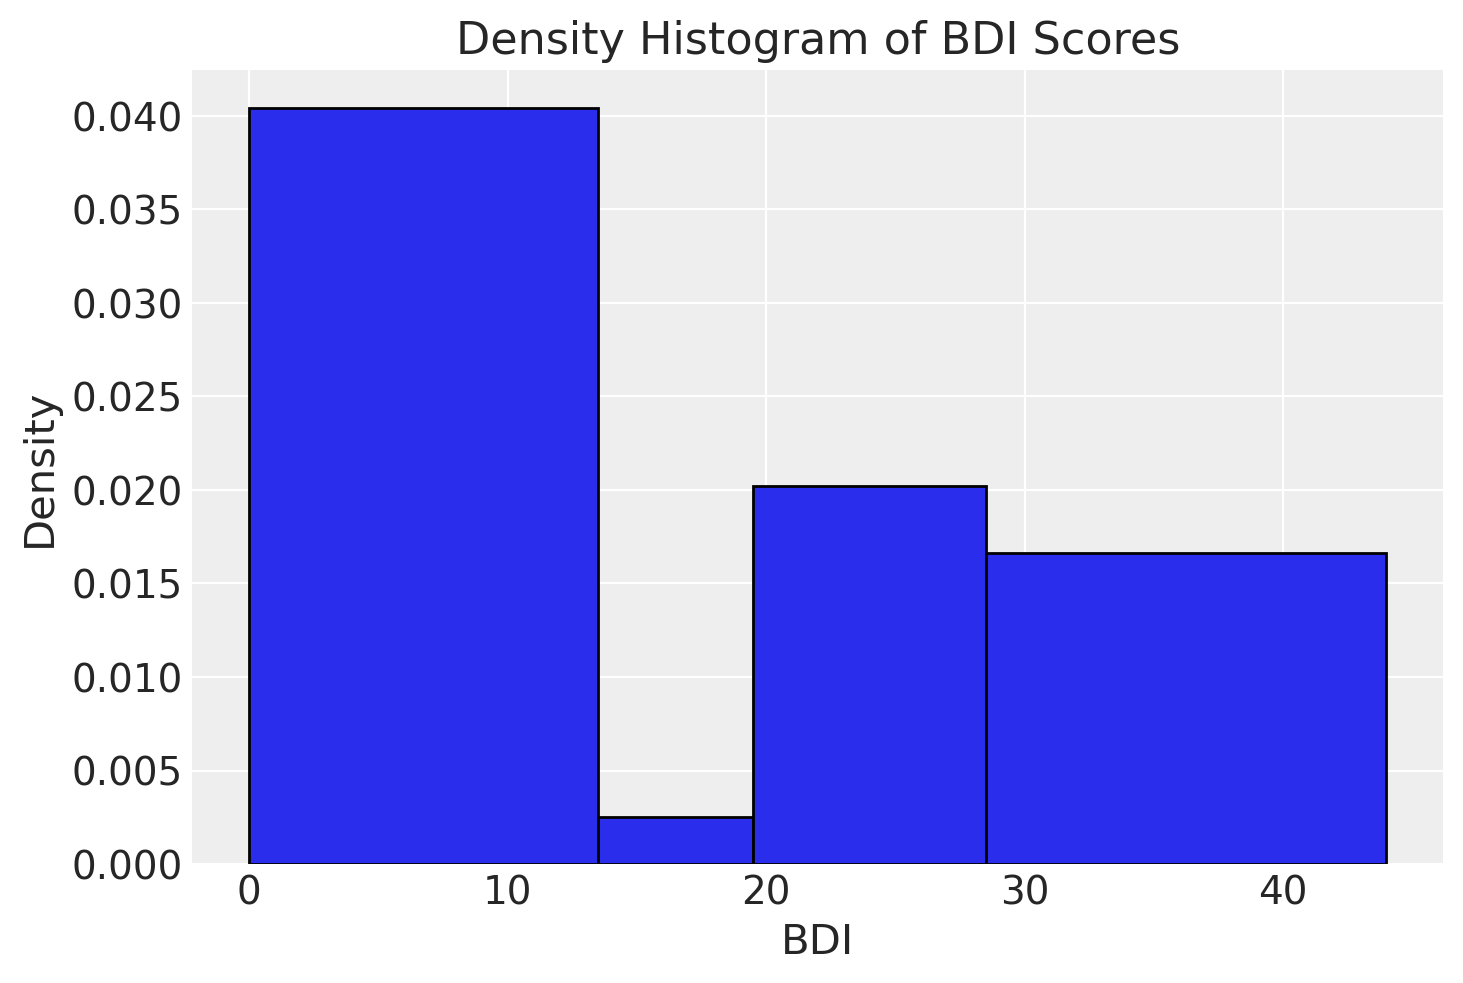

In [32]:
bdi_bins = [0, 13.5, 19.5, 28.5, 44]

plt.hist(df["bdi"], bins=bdi_bins, density=True, edgecolor="black")
plt.xlabel("BDI")
plt.ylabel("Density")
plt.title("Density Histogram of BDI Scores")
plt.show()

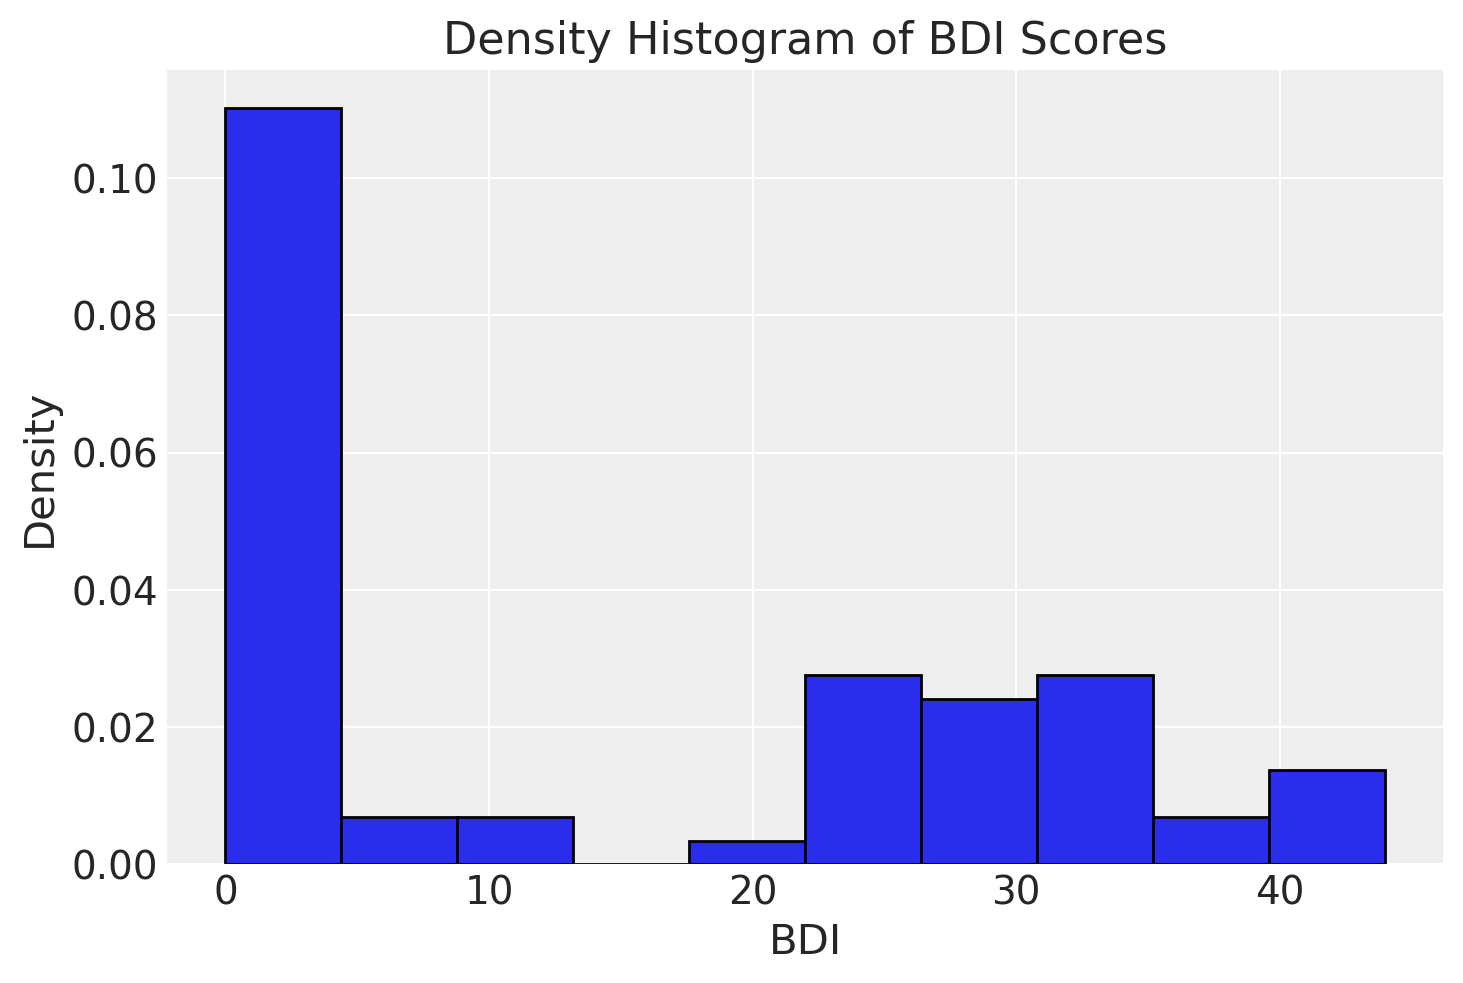

In [33]:
plt.hist(df["bdi"], density=True, edgecolor="black")
plt.xlabel("BDI")
plt.ylabel("Density")
plt.title("Density Histogram of BDI Scores")
plt.show()

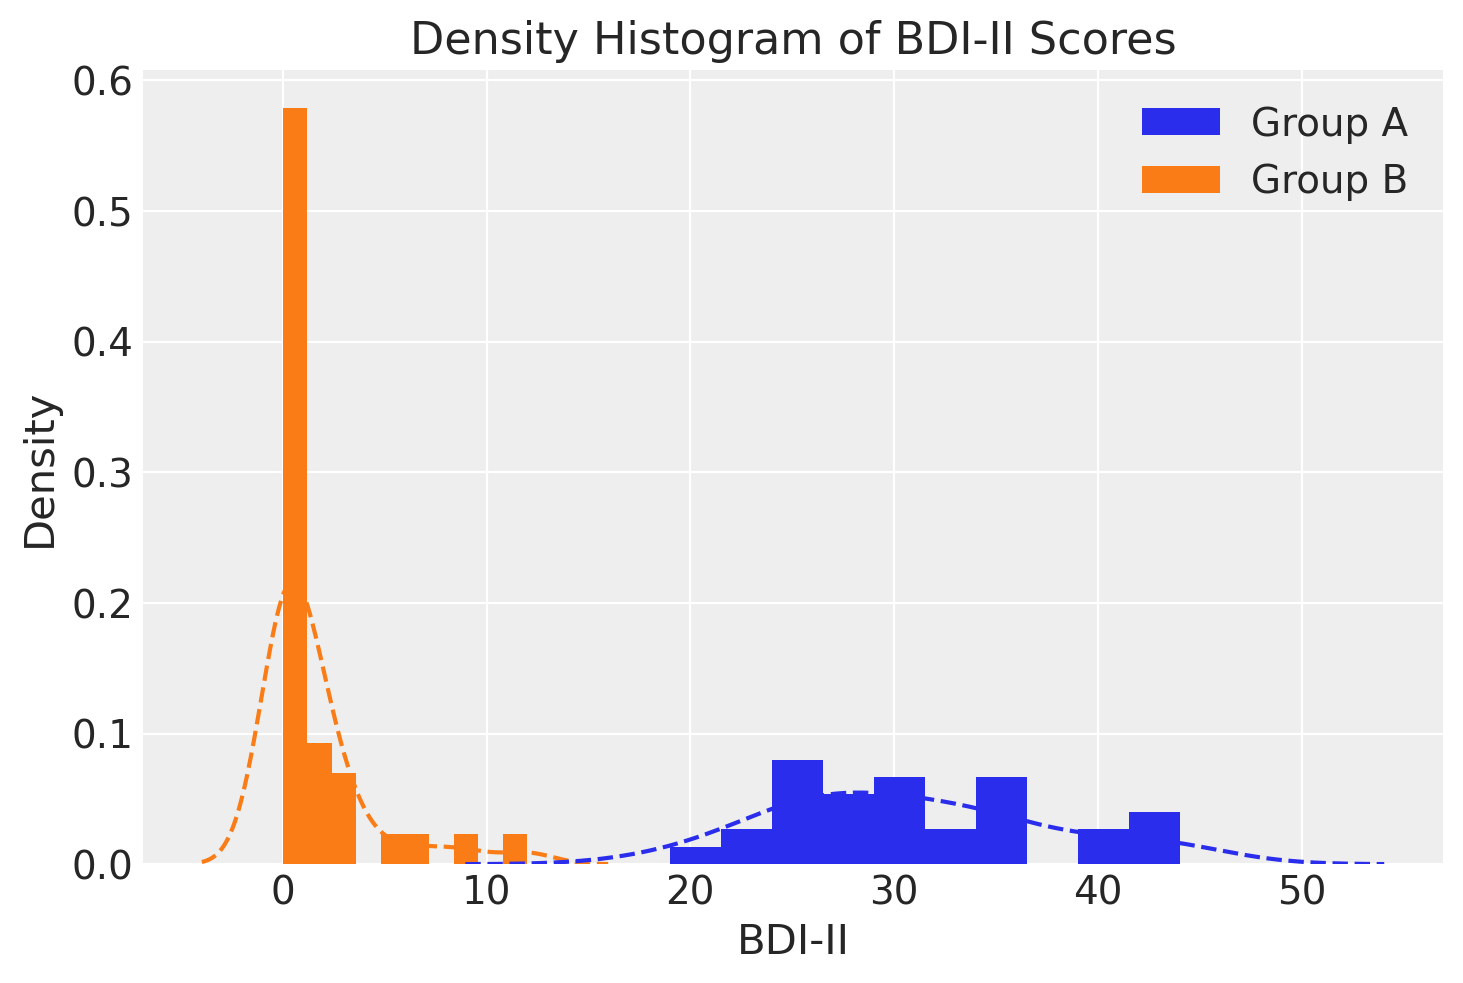

In [34]:
plt.hist(df[df["group"] == "mdd"]["bdi"], density=True, label="Group A")
plt.hist(df[df["group"] == "ctl"]["bdi"], density=True, label="Group B")
sns.kdeplot(data=df, x="bdi", hue="group", common_norm=False, linestyle='dashed')
plt.xlabel("BDI-II")
plt.ylabel("Density")
plt.title("Density Histogram of BDI-II Scores")
plt.legend()
plt.show();

In [35]:
x = [19, 26, 27, 28, 28, 33, 33, 41, 43]
np.quantile(x, 2 / 3)

33.0

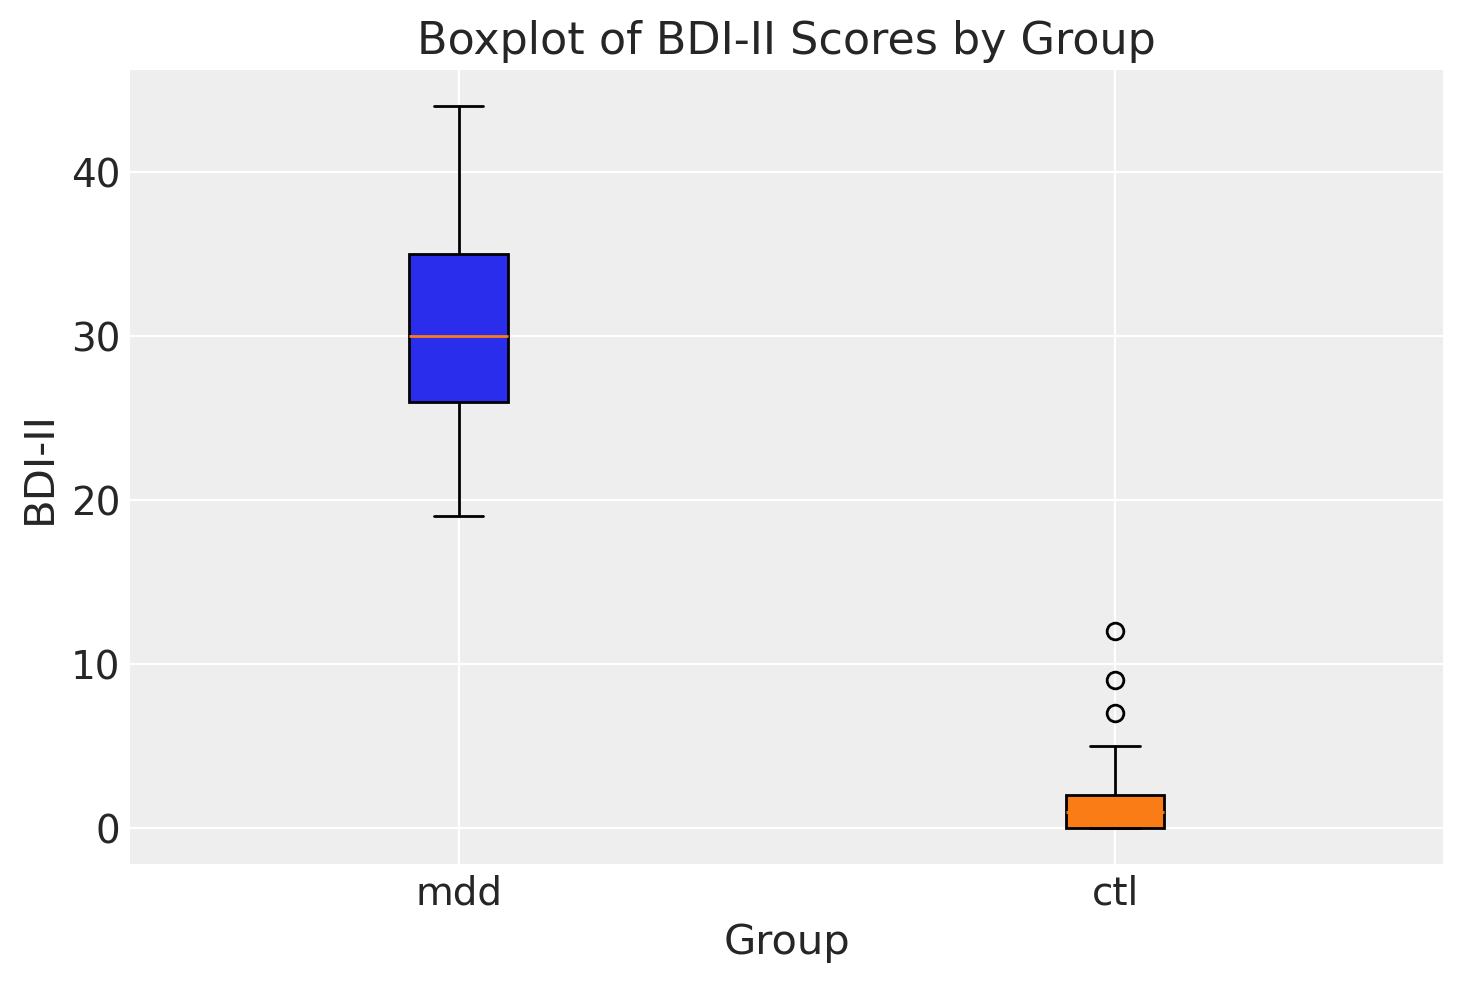

In [36]:
groups = df["group"].unique()
colors = ["C0", "C1"]

for i, group in enumerate(groups):
    subset = df[df["group"] == group]
    plt.boxplot(
        subset["bdi"],
        positions=[i],
        labels=[group],
        patch_artist=True,
        boxprops=dict(facecolor=colors[i]),
    )

plt.xlabel("Group")
plt.ylabel("BDI-II")
plt.title("Boxplot of BDI-II Scores by Group")
plt.show()

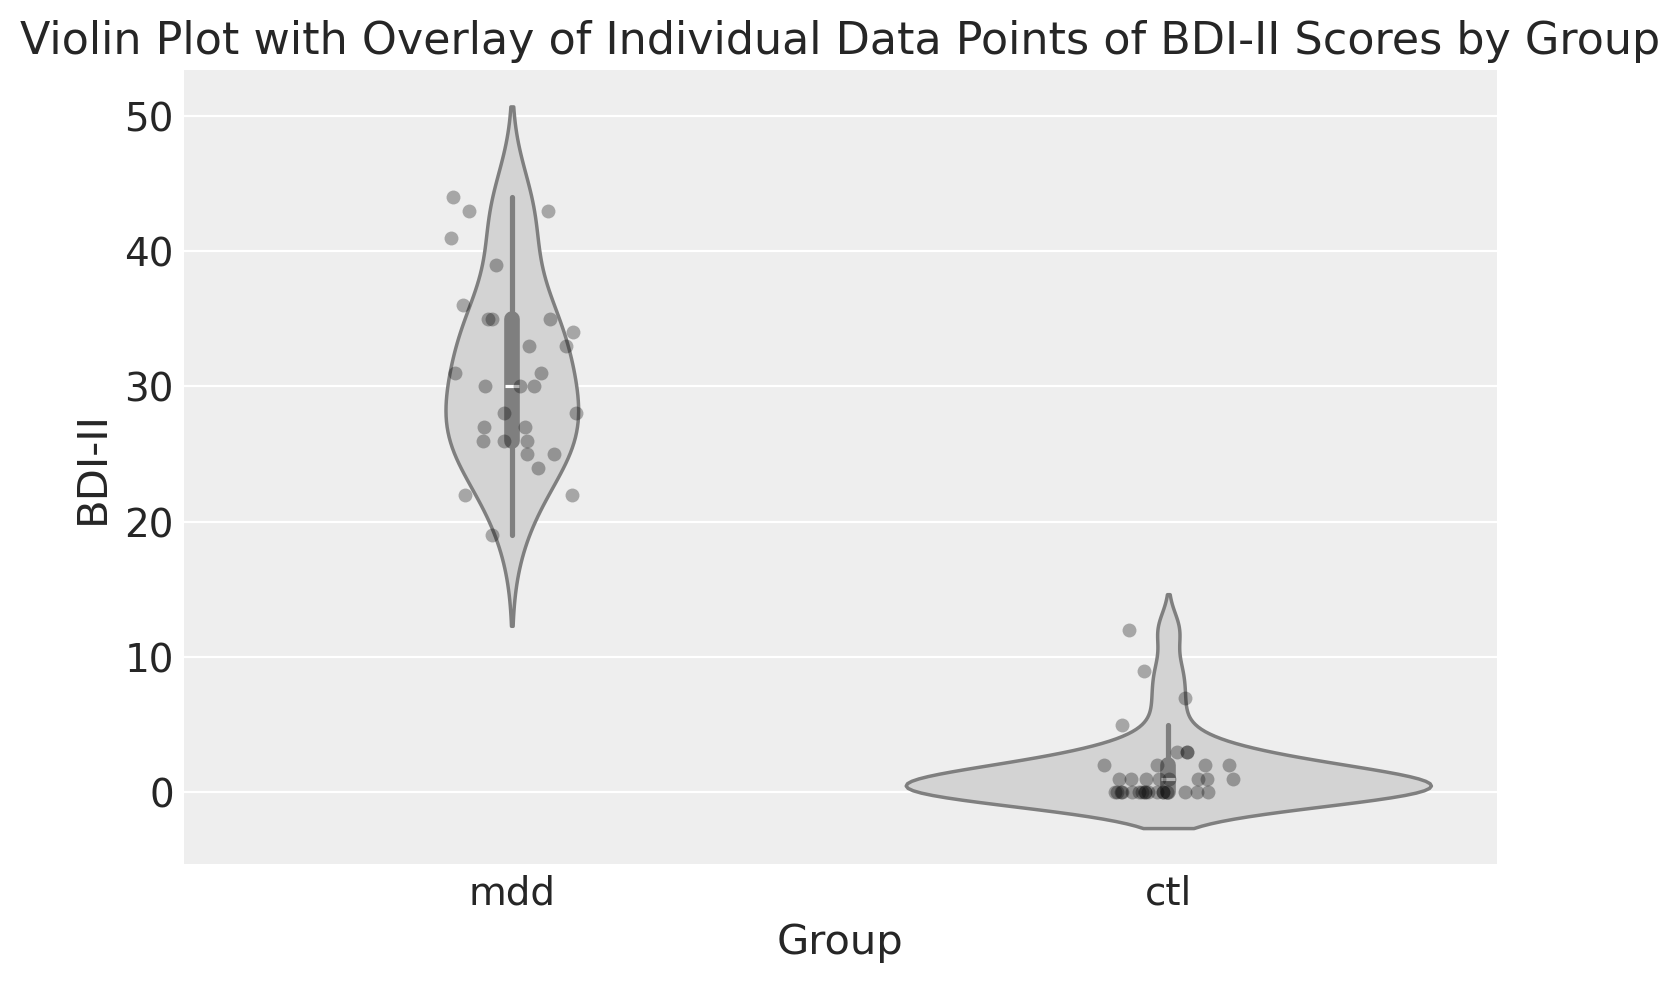

In [37]:
# Create the violin plot
sns.violinplot(x="group", y="bdi", data=df, color="lightgray")

# Overlay the individual data points using stripplot
sns.stripplot(x="group", y="bdi", data=df, color="black", size=5, jitter=True, alpha=0.3)

plt.ylabel("BDI-II")
plt.xlabel("Group")
plt.title("Violin Plot with Overlay of Individual Data Points of BDI-II Scores by Group")
plt.show()

In [38]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Jan 21 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

arviz     : 0.17.0
numpy     : 1.26.2
pandas    : 2.1.4
matplotlib: 3.8.2
seaborn   : 0.13.0

Watermark: 2.4.3

